In [41]:
import pandas as pd
import os.path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def format_csv(path : str = None, dataset_input : pd.DataFrame = None):
    if path is not None: dataset_input  = pd.read_csv(path)
    domains_unique = dataset_input['domain'].unique()
    output_dict = {'timestamp':list()}
    for domain in domains_unique: output_dict[domain]=list()
    for timestamp in dataset_input['timestamp'].unique():
        x = dataset_input.loc[dataset_input['timestamp'] == timestamp]
        output_dict['timestamp'].append(timestamp)
        for domain in domains_unique: 
            serie = x.loc[x['domain'] == domain]['measure']
            output_dict[domain].append(serie.iloc[0]) if len(serie)>0 else output_dict[domain].append(None)
    return pd.DataFrame(output_dict)

def merge_datasets(input_datasets : dict):
    for name, dataset in input_datasets.items(): dataset['dataset'] = name
    return pd.concat(input_datasets.values())

def delta_from_merge(merged_dataset : pd.DataFrame, delta_between : list):
    filtered_dataset = {}
    for dataset in delta_between:
        filtered_dataset[dataset] = dataset_merged.loc[dataset_merged['dataset'] == dataset]
    
    unique_keys = list(dataset_merged.keys())
    unique_keys.remove('timestamp')
    unique_keys.remove('dataset')
    pd.set_option('mode.chained_assignment', None)
    for key in unique_keys:
        filtered_dataset[delta_between[0]][key + '_delta'] = filtered_dataset[delta_between[1]][key] - filtered_dataset[delta_between[0]][key]
        filtered_dataset[delta_between[0]][key + '_delta%'] = (filtered_dataset[delta_between[0]][key + '_delta']/filtered_dataset[delta_between[1]][key])*100

    return filtered_dataset[delta_between[0]]

In [25]:
# Correct tornado datasets
dataset_list = ['consumption-' + str(level) + '%' for level in range(10,101,10)]
name = 'measures-stress/results-tornado/results-def/' + dataset_list[9]
dataset_formatted = pd.read_csv(name)
dataset_formatted.drop(dataset_formatted[dataset_formatted.timestamp >= 16000].index, inplace=True)
dataset_formatted.to_csv(name, index=False)

# Format datasets

## Tornado

In [63]:
root = 'measures-stress/results-tornado'
server_name = 'tornado'
folder_dict  = {'results-def':'default', 'results-singlesocket':'single-socket', 'results-smt':'smt'}
dataset_dict = {'consumption-' + str(level) + '%':level for level in range(10,101,10)}

In [67]:
raw_datasets     = list()
treated_datasets = list()
for folder, load_strategy in folder_dict.items():
    for file, process_usage in dataset_dict.items():
        path = root + '/' + folder + '/' + file
        # Raw dataset
        raw_dataset = pd.read_csv(path)
        raw_dataset['server'] = server_name
        raw_dataset['load_strategy'] = load_strategy
        raw_dataset['process_usage'] = process_usage
        raw_datasets.append(raw_dataset)
        # Formatted dataset
        treated_dataset = format_csv(path)
        treated_dataset['server'] = server_name
        treated_dataset['load_strategy'] = load_strategy
        treated_dataset['process_usage'] = process_usage
        treated_datasets.append(treated_dataset)

In [68]:
concat_raw     = pd.concat(raw_datasets)
concat_treated = pd.concat(treated_datasets)

concat_raw.to_csv(root + '/' + server_name + '-raw.csv', index=False)
concat_treated.to_csv(root + '/'  + server_name + '-treated.csv', index=False)

## Yeti

In [59]:
root = 'measures-stress/results-yeti'
server_name = 'yeti'
folder_dict  = {'results-def':'default', 'results-smt':'smt'}
dataset_dict = {'consumption-' + str(level) + '%':level for level in range(10,101,10)}

In [51]:
# Repeat treatment cell and export cell in tornado section

## Gros

In [66]:
root = 'measures-stress/results-gros'
server_name = 'gros'
folder_dict  = {'results-def':'default', 'results-smt':'smt'}
dataset_dict = {'consumption-' + str(level) + '%':level for level in range(10,101,10)}

In [ ]:
# Repeat treatment cell and export cell in tornado section

# Load pre-treated dataset

In [89]:
tornado_raw   = pd.read_csv('measures-stress/results-tornado/tornado-raw.csv')
tornado_treat = pd.read_csv('measures-stress/results-tornado/tornado-treated.csv')
                            
yeti_raw   = pd.read_csv('measures-stress/results-yeti/yeti-raw.csv')
yeti_treat = pd.read_csv('measures-stress/results-yeti/yeti-treated.csv')
                            
gros_raw   = pd.read_csv('measures-stress/results-gros/gros-raw.csv')
gros_treat = pd.read_csv('measures-stress/results-gros/gros-treated.csv')

full_raw   = pd.concat([tornado_raw, yeti_raw, gros_raw])
full_treat = pd.concat([tornado_treat, yeti_treat, gros_treat])

# Graphs

### Tornado

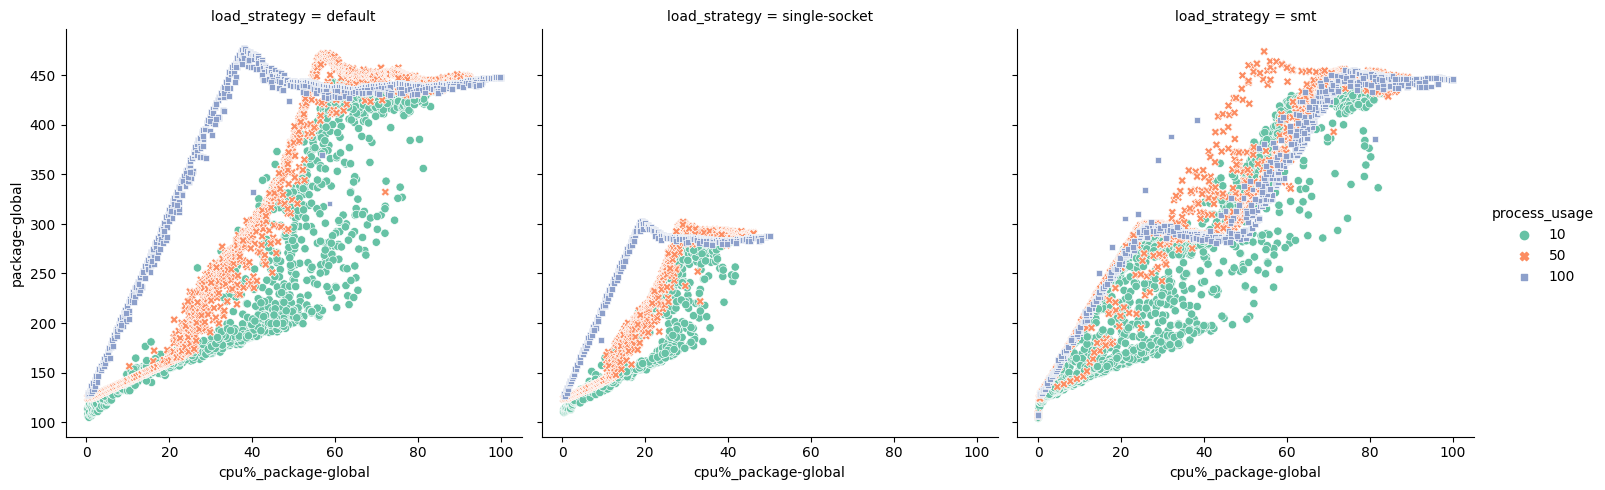

In [96]:
filtered_scatter = tornado_treat.loc[tornado_treat['process_usage'].isin([10,50,100])]
palette = sns.color_palette("Set2", filtered_scatter['process_usage'].nunique())

x = sns.relplot(data=filtered_scatter, x='cpu%_package-global', y='package-global',
                    col='load_strategy', hue='process_usage', style='process_usage',
                    palette=palette)

### Yeti

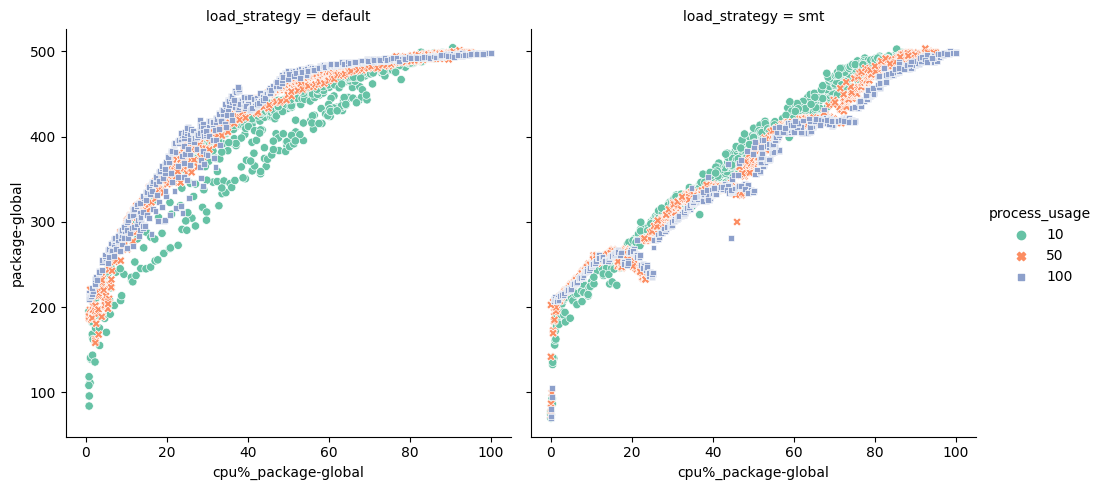

In [100]:
filtered_scatter = yeti_treat.loc[yeti_treat['process_usage'].isin([10,50,100])]
palette = sns.color_palette("Set2", filtered_scatter['process_usage'].nunique())

x = sns.relplot(data=filtered_scatter, x='cpu%_package-global', y='package-global',
                    col='load_strategy', hue='process_usage', style='process_usage',
                    palette=palette)

### Gros

In [ ]:
filtered_scatter = gros_treat.loc[gros_treat['process_usage'].isin([10,50,100])]
palette = sns.color_palette("Set2", filtered_scatter['process_usage'].nunique())

x = sns.relplot(data=filtered_scatter, x='cpu%_package-global', y='package-global',
                    col='load_strategy', hue='process_usage', style='process_usage',
                    palette=palette)